In [1]:
from gameagent import Agent
import gym
from ounoise import OUNoise
import numpy as np
import matplotlib.pyplot as plt

action_size = 1
exploration_mu = 0
exploration_theta = 0.15
exploration_sigma = 0.25
noise = OUNoise(action_size, exploration_mu, exploration_theta, exploration_sigma)

def _compute_discounted_R(R, discount_rate=.999):
    discounted_r = np.zeros_like(R, dtype=np.float32)
    running_add = 0
    for t in reversed(range(len(R))):
        running_add = running_add * discount_rate + R[t]
        discounted_r[t] = running_add
    discounted_r -= discounted_r.mean() 
    discounted_r /= discounted_r.std()

    return discounted_r

def compute_discounted_R(record,discounted_rate = 0.999):
    reward_list = [x[2] for x in record]
    reward_list = _compute_discounted_R(reward_list)
    for i in range(len(record)):
        record[i][2] = reward_list[i]
    return record



C:\Users\ie-49\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import gym
env = gym.make("MountainCarContinuous-v0")

In [17]:
def run_process(iteration, double_mode = False, train = True, render = False, train_batch_size = 128,verbose = False,reward_normalization = False):
    save_point = 1
    if train : 
        save_point = iteration // 10
    for iterate in range(iteration):
        if train & (iterate % save_point == 0):
            print('saved')
            agent.main_critic.model.save_weights("./well_trained_main_critic_"+str(iterate)+".h5")
            agent.main_actor.model.save_weights("./well_trained_main_actor_"+str(iterate)+".h5") 
        print('iterate : ',iterate)
        if double_mode :
            run_episode(train,render, train_batch_size, verbose, reward_normalization)
            run_episode(False,render, train_batch_size, verbose, reward_normalization)
        else:
            run_episode(train,render,train_batch_size,verbose,reward_normalization)

In [18]:
def run_episode(train = True, render = False, train_batch_size = 128,verbose = False,reward_normalization = False):
    record = []
    done = False
    frame = env.reset()
    ep_reward = 0
    while done != True:
        if render:
            env.render()
        state = frame.reshape(1,-1)
        state = (state - env.observation_space.low) / \
                (env.observation_space.high - env.observation_space.low)

        action = agent.get_action(state)
        if train : 
            action = np.clip((action +(noise.sample())), -1, 1)
        else :
            action = np.clip(action, -1,1)
        next_frame, reward, done, _ = env.step(action)
        record.append([state,action,reward,next_frame.reshape(1,-1),done])
        ep_reward += reward
        frame = next_frame
        if verbose :
            print('state : ', state, ', action :', action, ', reward : ',reward,', reward : ', reward,', done : ',done,\
                ', ep_reward : ',ep_reward)
        if done & train :
            if reward_normalization : 
                record = compute_discounted_R(record)
            list(map(lambda x : agent.memory.add(x[0],x[1],x[2],x[3],x[4]), record))
        if (len(agent.memory)>10000)& train:
            print('trained_start')
            agent.train()
            print('trained_well')
    print("ep_reward:", ep_reward)
    if train:
        episode_reward_lst.append(ep_reward)
    else:
        test_episode_reward_lst.append(ep_reward)


In [20]:
episode_reward_lst = []

In [21]:
test_episode_reward_lst = []

In [22]:
agent = Agent(2,1,train_batch_size = 128)
agent.main_actor.model.summary()
agent.main_critic.model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        (None, 2)                 0         
_________________________________________________________________
batch_normalization_17 (Batc (None, 2)                 8         
_________________________________________________________________
dense_41 (Dense)             (None, 32)                96        
_________________________________________________________________
dense_42 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_43 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 33        
Total params: 2,249
Trainable params: 2,245
Non-trainable params: 4
_________________________________________________________________
________

In [23]:
run_process(1000,double_mode=True, train=True,render = False, train_batch_size=128,verbose = False,reward_normalization=True)

saved
iterate :  0
ep_reward: -18.44100684090108
ep_reward: -0.024435636966349372
iterate :  1
ep_reward: -17.99780534781303
ep_reward: -0.016576674568237786
iterate :  2
ep_reward: 83.83082026509979
ep_reward: -0.026661138604316407
iterate :  3
ep_reward: 87.62900295616467
ep_reward: -0.017235872365953576
iterate :  4
ep_reward: -22.87340404724784
ep_reward: -0.03616418108364081
iterate :  5
ep_reward: -17.29574231110986
ep_reward: -0.023448526253209985
iterate :  6
ep_reward: 87.26792426045488
ep_reward: -0.025914590661755763
iterate :  7
ep_reward: 90.05742908346747
ep_reward: -0.04664303892568085
iterate :  8
ep_reward: -17.81740729977886
ep_reward: -0.015754193285513085
iterate :  9
ep_reward: 90.37540722615572
ep_reward: -0.013490487797701208
iterate :  10
ep_reward: 86.2070356071023
ep_reward: -0.017025140931377258
iterate :  11
ep_reward: 79.41505401617773
ep_reward: -0.014759928969721588
iterate :  12
trained_start
trained_well
ep_reward: 90.87247316176868
ep_reward: -2.111124

ep_reward: 92.15694325791611
ep_reward: 92.63725368166986
iterate :  112
trained_start
trained_well
ep_reward: 89.00811612300282
ep_reward: 97.27760247939923
iterate :  113
ep_reward: 83.74320021254859
ep_reward: 97.85457063090031
iterate :  114
ep_reward: 89.08010058694029
ep_reward: 97.433105699719
iterate :  115
ep_reward: 89.99025495551955
ep_reward: 97.59894944685483
iterate :  116
ep_reward: 89.43565680979962
ep_reward: 97.42439707307054
iterate :  117
ep_reward: 92.31906391509655
ep_reward: 97.60243175011628
iterate :  118
ep_reward: 87.07547018799157
ep_reward: 97.80621628953197
iterate :  119
ep_reward: -25.57529758367066
ep_reward: 97.68289996287474
iterate :  120
ep_reward: 87.53643837769555
ep_reward: 98.01306101075028
iterate :  121
ep_reward: 85.10124845141686
ep_reward: -2.2683959902180217
iterate :  122
ep_reward: 92.78506426545107
ep_reward: 97.84270114282182
iterate :  123
ep_reward: 89.33284860876634
ep_reward: 97.57445738627443
iterate :  124
ep_reward: 90.645364335

ep_reward: 98.00547321172124
iterate :  222
ep_reward: 91.71246567252882
ep_reward: 98.54734387541028
iterate :  223
ep_reward: 95.05913412995672
ep_reward: 98.39250001361877
iterate :  224
ep_reward: 86.50931293528342
ep_reward: 98.37487626798998
iterate :  225
ep_reward: 93.01344743265032
ep_reward: 98.61424646077667
iterate :  226
ep_reward: 93.92489786054387
ep_reward: 98.14022544160227
iterate :  227
ep_reward: 89.5214479126298
ep_reward: 98.36108931280168
iterate :  228
ep_reward: 93.90948840702237
ep_reward: 98.05485499062121
iterate :  229
ep_reward: 92.85837132004468
ep_reward: 98.07311847560504
iterate :  230
ep_reward: 91.63208600003334
ep_reward: -1.4328689408610649
iterate :  231
ep_reward: 90.66353150028331
ep_reward: -1.2472852297983328
iterate :  232
ep_reward: 86.95630456130397
ep_reward: 98.0888335665523
iterate :  233
ep_reward: 92.25100017585807
ep_reward: -1.4282304969793176
iterate :  234
ep_reward: 94.98103444833734
ep_reward: 98.23199446820678
iterate :  235
ep_

ep_reward: -20.62507274392737
iterate :  331
ep_reward: -32.98430399812023
ep_reward: -22.09511888671755
iterate :  332
trained_start
trained_well
ep_reward: -34.06511658217413
ep_reward: -41.44079899088561
iterate :  333
ep_reward: -36.73355466993863
ep_reward: -40.95523823810569
iterate :  334
ep_reward: -52.93315515852041
ep_reward: -41.26014690244839
iterate :  335
ep_reward: -52.13749785276226
ep_reward: -41.24721160960879
iterate :  336
ep_reward: -48.98726114306712
ep_reward: -41.523566931995056
iterate :  337
ep_reward: -40.812654311766956
ep_reward: -41.500562290982444
iterate :  338
ep_reward: -42.12395492409095
ep_reward: -41.12534041035197
iterate :  339
ep_reward: -45.07486793536451
ep_reward: -41.18747259047861
iterate :  340
ep_reward: -43.50057820751851
ep_reward: -41.23609663145523
iterate :  341
ep_reward: -47.91247006599399
ep_reward: -41.525042497013665
iterate :  342
trained_start
trained_well
ep_reward: -48.60850033323011
ep_reward: -48.859227208100165
iterate :  

ep_reward: -43.71363323750806
iterate :  436
ep_reward: -45.51444079327139
ep_reward: -43.595238614577866
iterate :  437
ep_reward: -49.085487253643095
ep_reward: -43.60463595983985
iterate :  438
ep_reward: -51.292063054348915
ep_reward: -43.6396414845394
iterate :  439
ep_reward: -54.139490690372675
ep_reward: -43.82971123436615
iterate :  440
ep_reward: -46.099256133761294
ep_reward: -43.755350036317424
iterate :  441
ep_reward: -50.11551533267497
ep_reward: -43.68090699704124
iterate :  442
trained_start
trained_well
ep_reward: -44.94326376211324
ep_reward: -43.71609084945805
iterate :  443
ep_reward: -52.86051727805576
ep_reward: -43.91841128618759
iterate :  444
ep_reward: -53.34220955710018
ep_reward: -43.711730096390845
iterate :  445
ep_reward: -50.86170036121006
ep_reward: -43.92869955906807
iterate :  446
ep_reward: -44.79347570556324
ep_reward: -43.663498294392795
iterate :  447
ep_reward: -49.21397171208554
ep_reward: -43.684654528290025
iterate :  448
ep_reward: -48.00762

ep_reward: -5.228379745423036
iterate :  541
ep_reward: -25.03900748987343
ep_reward: -5.218405616566072
iterate :  542
ep_reward: -27.91854864135249
ep_reward: -5.223475309957609
iterate :  543
trained_start
trained_well
ep_reward: -30.1547110045778
ep_reward: -6.688701318477232
iterate :  544
ep_reward: -29.52907150091637
ep_reward: -6.694232719165796
iterate :  545
ep_reward: -26.399594721595662
ep_reward: -6.688533519140073
iterate :  546
ep_reward: -27.853508508180774
ep_reward: -6.6843613212354995
iterate :  547
ep_reward: -24.026750861976037
ep_reward: -6.701717596634908
iterate :  548
ep_reward: -26.44799277031561
ep_reward: -6.6990077616939
iterate :  549
ep_reward: -23.087499206120448
ep_reward: -6.694651861205123
iterate :  550
ep_reward: -26.25567343271971
ep_reward: -6.696248704422116
iterate :  551
ep_reward: -28.06923428529707
ep_reward: -6.693550661267858
iterate :  552
ep_reward: -29.654321590110932
ep_reward: -6.684025487455259
iterate :  553
trained_start
trained_wel

ep_reward: 81.55714299924755
ep_reward: -27.556220768065494
iterate :  647
ep_reward: 90.44084169382435
ep_reward: 78.75310452367195
iterate :  648
ep_reward: 79.1030034649136
ep_reward: 76.74630851458213
iterate :  649
ep_reward: 75.99963296014452
ep_reward: 84.96002739461491
iterate :  650
trained_start
trained_well
ep_reward: 85.24423083583578
ep_reward: -24.063582870727704
iterate :  651
ep_reward: 61.15466232466286
ep_reward: -23.929073442473467
iterate :  652
ep_reward: 92.46318960417464
ep_reward: 81.13372671263146
iterate :  653
ep_reward: 72.0247343687711
ep_reward: -23.929686130208417
iterate :  654
ep_reward: 83.65657840778644
ep_reward: 81.04794848805268
iterate :  655
ep_reward: 83.15212711901628
ep_reward: -23.939866411572925
iterate :  656
ep_reward: 84.01395653718663
ep_reward: 81.15017556653737
iterate :  657
ep_reward: 92.22030425616342
ep_reward: -23.97987930020203
iterate :  658
ep_reward: 78.78272169747532
ep_reward: -23.914367460072576
iterate :  659
ep_reward: -3

ep_reward: -14.3093594403603
iterate :  755
ep_reward: 77.35278089294775
ep_reward: -14.399193543617843
iterate :  756
ep_reward: 76.97015222853703
ep_reward: -14.274018564965612
iterate :  757
ep_reward: 85.06892131176399
ep_reward: -14.274294051814085
iterate :  758
ep_reward: 88.53794485895173
ep_reward: -14.261383335370788
iterate :  759
ep_reward: 87.71751934294149
ep_reward: -14.31966589550063
iterate :  760
ep_reward: 84.59995539624633
ep_reward: -14.3089240147627
iterate :  761
ep_reward: -29.925635037771848
ep_reward: -14.385728017495007
iterate :  762
ep_reward: -26.964155545005138
ep_reward: -14.311728584072592
iterate :  763
ep_reward: 87.66754860656818
ep_reward: -14.265526858986936
iterate :  764
ep_reward: 72.82163575039131
ep_reward: -14.300111027881986
iterate :  765
ep_reward: 93.69515715174381
ep_reward: -14.236705344255231
iterate :  766
ep_reward: 90.224966824355
ep_reward: -14.393028289734625
iterate :  767
ep_reward: 73.75676475813944
ep_reward: -14.3090618686745

ep_reward: 58.178862933376955
ep_reward: -92.59501167101793
iterate :  864
ep_reward: 50.832348383355075
ep_reward: -92.36093122265264
iterate :  865
ep_reward: 35.427827479491924
ep_reward: -92.32746719646128
iterate :  866
ep_reward: 69.53570120809793
ep_reward: -92.32508554457972
iterate :  867
ep_reward: -73.3064462168548
ep_reward: -92.4052857926167
iterate :  868
ep_reward: 63.11371688539208
ep_reward: -92.61949873366706
iterate :  869
ep_reward: 63.444831377723496
ep_reward: -92.93828593186066
iterate :  870
ep_reward: 84.20112020012502
ep_reward: -92.33217704658615
iterate :  871
ep_reward: 71.75496127132322
ep_reward: -92.5770057991766
iterate :  872
ep_reward: -74.93763470352152
ep_reward: -92.59941448190403
iterate :  873
trained_start
trained_well
ep_reward: -68.8133986116929
ep_reward: -98.44365714056441
iterate :  874
ep_reward: 44.839444172866266
ep_reward: -98.50408557673309
iterate :  875
ep_reward: -76.42712265623939
ep_reward: -98.4094036123859
iterate :  876
ep_rewa

ep_reward: 25.82740287589324
ep_reward: -97.87591708176384
iterate :  972
ep_reward: -73.36784779975129
ep_reward: -97.82455328640869
iterate :  973
ep_reward: -79.54113373580523
ep_reward: -97.90443720178266
iterate :  974
ep_reward: -76.69608045026139
ep_reward: -97.84973233369513
iterate :  975
ep_reward: 78.0164448541392
ep_reward: -97.8992624196262
iterate :  976
ep_reward: -72.28942715320728
ep_reward: -97.89274651110532
iterate :  977
ep_reward: 63.9008684955181
ep_reward: -97.90631995131866
iterate :  978
ep_reward: -71.88106689587984
ep_reward: -97.91621427020384
iterate :  979
trained_start
trained_well
ep_reward: -68.49889808045805
ep_reward: -99.58437446073555
iterate :  980
ep_reward: 64.17180262787929
ep_reward: -99.61296344739749
iterate :  981
ep_reward: 29.698079049236327
ep_reward: -99.61020097930016
iterate :  982
ep_reward: 18.560349160678953
ep_reward: -99.61994361127235
iterate :  983
ep_reward: -72.0463973676985
ep_reward: -99.61488841556714
iterate :  984
ep_rew

In [26]:
import seaborn as sns

In [32]:
np.cumsum(np.random.randn(500, 6), 0).shape

(500, 6)

In [49]:
ep = np.array(episode_reward_lst).reshape(-1,1)
test_ep = np.array(test_episode_reward_lst).reshape(-1,1)

array([[-1.84410068e+01, -2.44356370e-02],
       [-1.79978053e+01, -1.65766746e-02],
       [ 8.38308203e+01, -2.66611386e-02],
       ...,
       [-7.22997900e+01, -9.95984117e+01],
       [ 8.19677385e+01, -9.95753811e+01],
       [ 4.47210209e+01, -9.96087736e+01]])

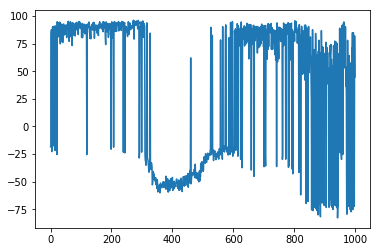

In [24]:
plt.plot(episode_reward_lst)

In [ ]:
if __name__ == '__main__':
    env = gym.make("MountainCarContinuous-v0")
    episode_reward_lst = []
    test_episode_reward_lst = []
    agent = Agent(2,1,train_batch_size = 128)
    agent.main_actor.model.summary()
    agent.main_critic.model.summary()

    run_process(1000,double_mode=True, train=True,render = False, train_batch_size=128,verbose = False,reward_normalization=True)

In [ ]:
import argparse

In [ ]:
def main():
    parser = argparse.ArgumentParser('parameters')

    parser.add_argument('--epochs', type=int, default=100, help='number of epochs, (default: 100)')
    parser.add_argument('--e', type=str, default='MountainCarContinuous-v0', help='environment name, (default: MountainCarContinuous-v0)')
    parser.add_argument('--d', type=bool, default=False, help='train and test alternately. (default : False)')
    parser.add_argument('--t', type=bool, default=True, help="True if training, False if test. (default: True)")
    parser.add_argument('--r', type=bool, default=False, help='rendering the game environment. (default : False)')
    parser.add_argument('--b', type=int, default=128, help='train batch size. (default : 128)')
    parser.add_argument('--v', type=bool, default=False, help='verbose mode. (default : False)')
    parser.add_argument('--n', type=bool, default=True, help='reward normalization. (default : True)')
    parser.add_argument('--sp', type=int, default=True, help='save point. epochs // sp. (default : 100)')
    args = parser.parse_args()
    configuration(args.e,args.b,args.epochs,args.d,args.t,args.r,args.v,args.n)

In [72]:
env = gym.make("MountainCarContinuous-v0")

In [87]:
def __name__== '__main__':
    main()

2

In [ ]:
def configuration(environment,batch_size,epochs,double_mode,train,render,verbose,reward_normalization,save_point):
    global agent
    global env
    global episode_reward_lst
    global test_episode_reward_lst
    env = gym.make(environment)
    episode_reward_lst = []
    test_episode_reward_lst = []
    agent = Agent(env.observation_space.shape[0],env.action_space.shape[0],train_batch_size = batch_size)
    
    agent.main_actor.model.summary()
    agent.main_critic.model.summary()

    run_process(epochs,double_mode=double_mode, train=train,render = render, train_batch_size=batch_size,\
                verbose = verbose,reward_normalization=reward_normalization,save_point)

In [71]:
#fig = plt.figure()
%matplotlib tk
plt.plot(ep,label='train')
plt.plot(test_ep,label='test')
plt.legend()
plt.show()

#plt.set_xlabel('epochs')
#plt.set_ylabel('rewards')


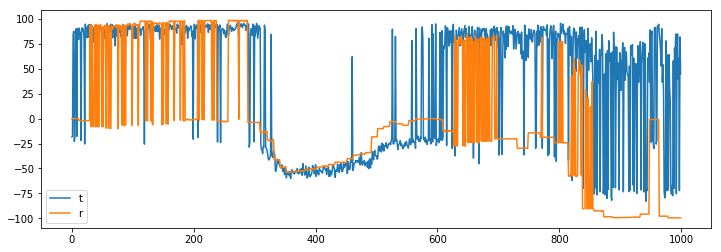

In [58]:
plt.figure(figsize=(12, 4))
plt.plot(np.concatenate((ep,test_ep),axis=1))
plt.legend('t')
plt.show()

In [ ]:
run_episode(100,train=False,render = False, train_batch_size=512,verbose = False)

In [33]:
env.close()